<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T5_Gillespie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Contexto del ejercicio.

Suponemos que en una población de N-1 individuos sanos y 1 infectado (generación 0) ocurren contactos entre los idividuos con distribución $Poisson(\lambda)$.
Cuando este contacto involucra un individuo sano y un individuo infectado, se genera un contagio con probabilidad $p$. Los individuos sanos pasan a la categoría de infectados durante el resto de la simulación.


Se puede mostrar que el tiempo esperado en el que los N-1 individuos sanos pasan a la clase de infectados está dada por 

$$E(T)=\frac{N-1}{p\lambda}\sum\limits_{k=1}^{N-1}\frac{1}{k}$$



En este código, se realizan simulaciones para varios valores de $p$, $\lambda$, $N$ para comparar los tiempos de espera obtenidos con el tiempo de espera estimado.

In [2]:
def Expected_value(lamb,p,N):
    E=0
    for j in range(1,N):
        E+=1/j
    return (((N-1)/(lamb*p))*E)

In [3]:
def simulacion_Gillespie(lamb,p,N):
    sanos=N-1
    tiempo=0
    history_s=[N-1]
    history_t=[0]
    while(sanos>0):
        lamb_k=(lamb*p*((N-sanos))/(N-1))*(sanos/N)*2
        r1=np.random.uniform(0,1)
        tau=np.log(1/r1)/lamb_k#Genera un tiempo de distribucion exponential(lamb_k), es decir, un contacto.
        sanos-=1
        tiempo+=tau
        history_t.append(tiempo)
        history_s.append(sanos)
    return history_t,history_s

Valor esperado teórico:  205.024149698529


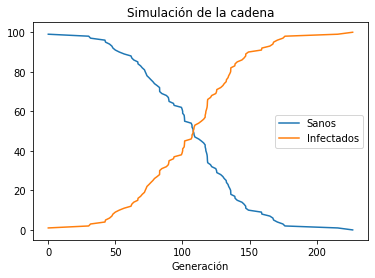

In [18]:
np.random.seed(5)
print("Valor esperado teórico: ",Expected_value(10,0.25,100))
sim_t,sim_s=simulacion_Gillespie(10,0.25,100)
plt.title('Simulación de la cadena')
plt.plot(sim_t,sim_s,label='Sanos')
plt.plot(sim_t,np.repeat(100,len(sim_s))-sim_s,label='Infectados')
plt.xlabel('Generación')
plt.legend()
plt.show()


Para comparar entre los tiempos de contagio total con el valor esperado dado por la fórmula, consideraremos un set de parámetros fijos, y para diferentes semillas, 

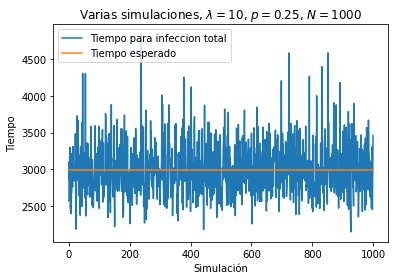

[['lambda=3\np=0.2\nN=100', 854.26729, 844.20459], ['lambda=3\np=0.2\nN=1000', 12461.64398, 12434.31914], ['lambda=3\np=0.25\nN=100', 683.41383, 686.273], ['lambda=3\np=0.25\nN=1000', 9969.31519, 9934.69748], ['lambda=3\np=0.5\nN=100', 341.70692, 342.8313], ['lambda=3\np=0.5\nN=1000', 4984.65759, 5008.17107], ['lambda=5\np=0.2\nN=100', 512.56037, 512.61588], ['lambda=5\np=0.2\nN=1000', 7476.98639, 7481.46056], ['lambda=5\np=0.25\nN=100', 410.0483, 408.32106], ['lambda=5\np=0.25\nN=1000', 5981.58911, 5963.60252], ['lambda=5\np=0.5\nN=100', 205.02415, 202.87539], ['lambda=5\np=0.5\nN=1000', 2990.79456, 2986.67505], ['lambda=10\np=0.2\nN=100', 256.28019, 255.40196], ['lambda=10\np=0.2\nN=1000', 3738.49319, 3741.67668], ['lambda=10\np=0.25\nN=100', 205.02415, 203.60966], ['lambda=10\np=0.25\nN=1000', 2990.79456, 2976.07308], ['lambda=10\np=0.5\nN=100', 102.51207, 102.16091], ['lambda=10\np=0.5\nN=1000', 1495.39728, 1500.47629]]


In [34]:
lambs=[3,5,10]
probas=[0.2,0.25,0.5]
N_s=[100,1000]
W=[]
for lamb in lambs:
    for proba in probas:
        for N in N_s:
            if(lamb==10 and proba==0.25 and N==1000):
                tiempos_por_simulacion=[]
                for rep in range(1000):
                    sim_t,sim_s=simulacion_Gillespie(lamb,proba,N)
                    tiempo_final=sim_t[-1]
                    tiempos_por_simulacion.append(tiempo_final)
                plt.plot(tiempos_por_simulacion,label='Tiempo para infeccion total')
                plt.plot([0,999],np.repeat(Expected_value(lamb,proba,N),2),label='Tiempo esperado')
                plt.xlabel('Simulación')
                plt.ylabel('Tiempo')
                plt.legend()
                plt.title(r'Varias simulaciones, $\lambda=10$, $p=0.25$, $N=1000$')
                plt.show()
                u=['lambda='+str(lamb)+'\np='+str(proba)+'\nN='+str(N),np.round(Expected_value(lamb,proba,N),5)]
                t_simulaciones=[]
                for rep in range(1000):
                    t_f=simulacion_Gillespie(lamb,proba,N)[0][-1]
                    t_simulaciones.append(t_f)
                u.append(np.round(np.mean(t_simulaciones),5))
                W.append(u)
            else:
                u=['lambda='+str(lamb)+'\np='+str(proba)+'\nN='+str(N),np.round(Expected_value(lamb,proba,N),5)]
                t_simulaciones=[]
                for rep in range(1000):
                    t_f=simulacion_Gillespie(lamb,proba,N)[0][-1]
                    t_simulaciones.append(t_f)
                u.append(np.round(np.mean(t_simulaciones),5))
                W.append(u)
print(W)

In [35]:
from tabulate import tabulate
print(tabulate(W, headers=['Parametros', 'Valor Esperado', 'Valor observado'],tablefmt="grid"))

+--------------+------------------+-------------------+
| Parametros   |   Valor Esperado |   Valor observado |
+==============+==================+===================+
| lambda=3     |          854.267 |           844.205 |
| p=0.2        |                  |                   |
| N=100        |                  |                   |
+--------------+------------------+-------------------+
| lambda=3     |        12461.6   |         12434.3   |
| p=0.2        |                  |                   |
| N=1000       |                  |                   |
+--------------+------------------+-------------------+
| lambda=3     |          683.414 |           686.273 |
| p=0.25       |                  |                   |
| N=100        |                  |                   |
+--------------+------------------+-------------------+
| lambda=3     |         9969.32  |          9934.7   |
| p=0.25       |                  |                   |
| N=1000       |                  |             